# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'lifeexpectancy'<br>
table_name = 'lifeexpectancy'<br>

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [50]:
#import packages 
import pandas as pd
import numpy as np 
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
import geopandas as gpd
from sqlalchemy import create_engine
import warnings 

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [51]:
#read in data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

le_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

#sort data by country and year

le_df = le_df.sort_values(['Country','Year'])

pd.set_option('display.max_columns', None)

le_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,13.0,122,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,13.4,122,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,13.8,120,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8


In [52]:
le_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Variable description 
- Adult mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- Hepatitis B: Hepatitis BHepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 yearsPrevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

Get general idea about the dataset. 

In [53]:
le_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 15 to 2922
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-nul

In [54]:
le_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Deal with missing values

In [55]:
le_df.isnull().sum()/le_df.isnull().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

I examined missing data for the target variable 'Life expectancy', and independent variables 'Population', 'Hepatitis B ', 'GDP' that have relatively large amount of missing values.

In [56]:
#examine missing values in the target variable
le_df[le_df['Life expectancy '].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1651,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1716,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1813,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1910,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1959,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2168,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2217,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


By checking missing for the target variable, all of them are from 10 countries that appeared only once in the dataset. Since there is no information about their life expectancy, I removed them from analysis. 

In [8]:
le0 = le_df.dropna(axis=0, subset=['Life expectancy '])
le0.isnull().sum()/le0.isnull().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.065915
percentage expenditure             0.000000
Hepatitis B                        0.188866
Measles                            0.000000
 BMI                               0.010929
under-five deaths                  0.000000
Polio                              0.006489
Total expenditure                  0.077186
Diphtheria                         0.006489
 HIV/AIDS                          0.000000
GDP                                0.151298
Population                         0.219945
 thinness  1-19 years              0.010929
 thinness 5-9 years                0.010929
Income composition of resources    0.054645
Schooling                          0.054645
dtype: float64

In [57]:
#examine Population that has the largest amount of missing values 
le0[le0['Population'].isnull()]['Country'].value_counts()

New Zealand                                             16
Iran (Islamic Republic of)                              16
Congo                                                   16
Kuwait                                                  16
Saint Vincent and the Grenadines                        16
Singapore                                               16
The former Yugoslav republic of Macedonia               16
Bahamas                                                 16
United States of America                                16
Micronesia (Federated States of)                        16
Oman                                                    16
Qatar                                                   16
Bahrain                                                 16
Yemen                                                   16
Saint Lucia                                             16
Slovakia                                                16
Czechia                                                 

In [61]:
#examine GDP that has the 2nd largest amount of missing values 
le0[le0['GDP'].isnull()]['Country'].value_counts()

Lao People's Democratic Republic                        16
Egypt                                                   16
Gambia                                                  16
Czechia                                                 16
Slovakia                                                16
Saint Lucia                                             16
Yemen                                                   16
Democratic People's Republic of Korea                   16
Viet Nam                                                16
Micronesia (Federated States of)                        16
United States of America                                16
Bahamas                                                 16
Saint Vincent and the Grenadines                        16
Congo                                                   16
Venezuela (Bolivarian Republic of)                      16
Iran (Islamic Republic of)                              16
Republic of Korea                                       

41 out of 183 countries have missing population data. Except for Eritrea, all 40 countries don't have population data across all 16 years (e.g., US, UK, South Korea). I will leave the population column as is for other countries and keep in mind the usability of the population variable. I probably won't include population in the model since it has nearly no correlation with life expectancy. Regarding GDP, there are 33 countries having missing data and 25 of them don't have GDP data across all 16 years. However, as I detected abnomalities in the data (see below), I decided to replace outliers with nan and then come back to deal with missing values. 

In [11]:
le0[le0['Country']=='Eritrea'][['Country','Year','GDP','Population']]

,Country,Year,GDP,Population
866,Eritrea,2000,28.196949,339281.0
865,Eritrea,2001,215.139213,3497124.0
864,Eritrea,2002,21.768798,3614639.0
863,Eritrea,2003,232.794546,3738265.0
862,Eritrea,2004,287.422224,3858623.0
861,Eritrea,2005,276.758960,39697.0
860,Eritrea,2006,297.828588,466648.0
859,Eritrea,2007,317.329434,4153332.0
858,Eritrea,2008,326.825642,4232636.0
857,Eritrea,2009,43.754450,431334.0


### Deal with outliers 

Use boxplots to visulize outliers. As we can see, there are outliers in all variables except for alcholo and BMI. 

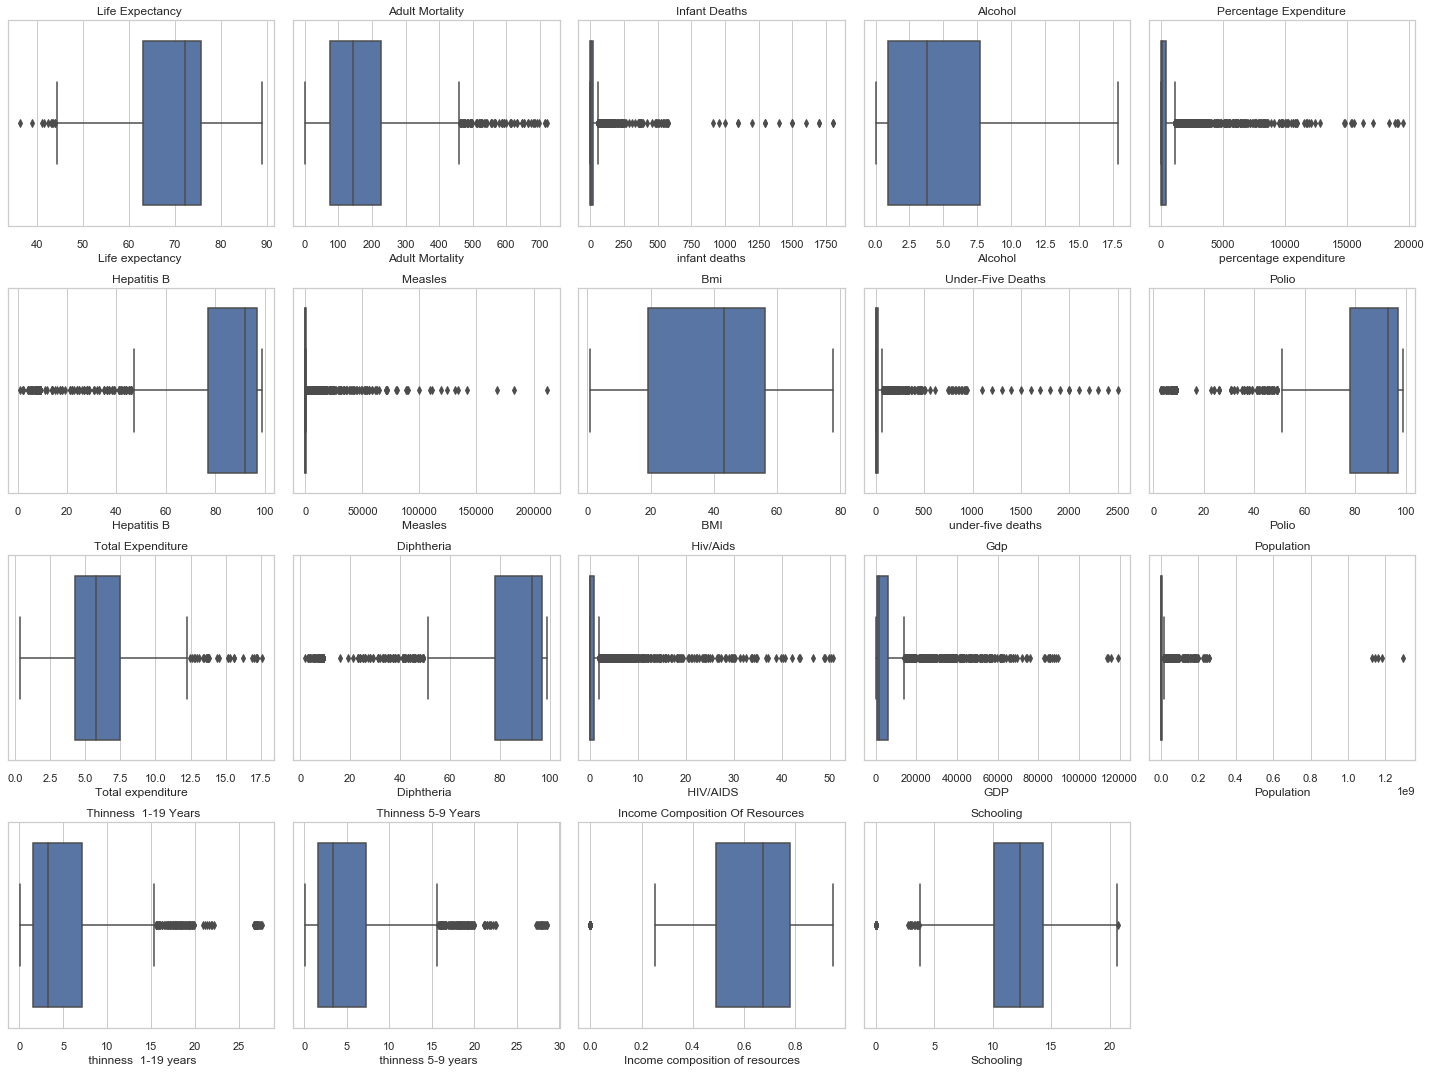

In [12]:
#check outliers 
plt.figure(figsize=(20,15))

var = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# histograms of the original data

for i in range(len(var)):
    
    plt.subplot(4, 5, i+1)
    sns.boxplot(le0[var[i]])
    plt.title(var[i].title())

plt.tight_layout()
plt.show()

In [13]:
valid_country = []

allcountry = list(le0['Country'].value_counts().index)

missGDP = list(le0[le0['GDP'].isnull()]['Country'].value_counts().index[:26])

for i in allcountry:
    if i not in missGDP:
        valid_country.append(i)

len(valid_country)

157

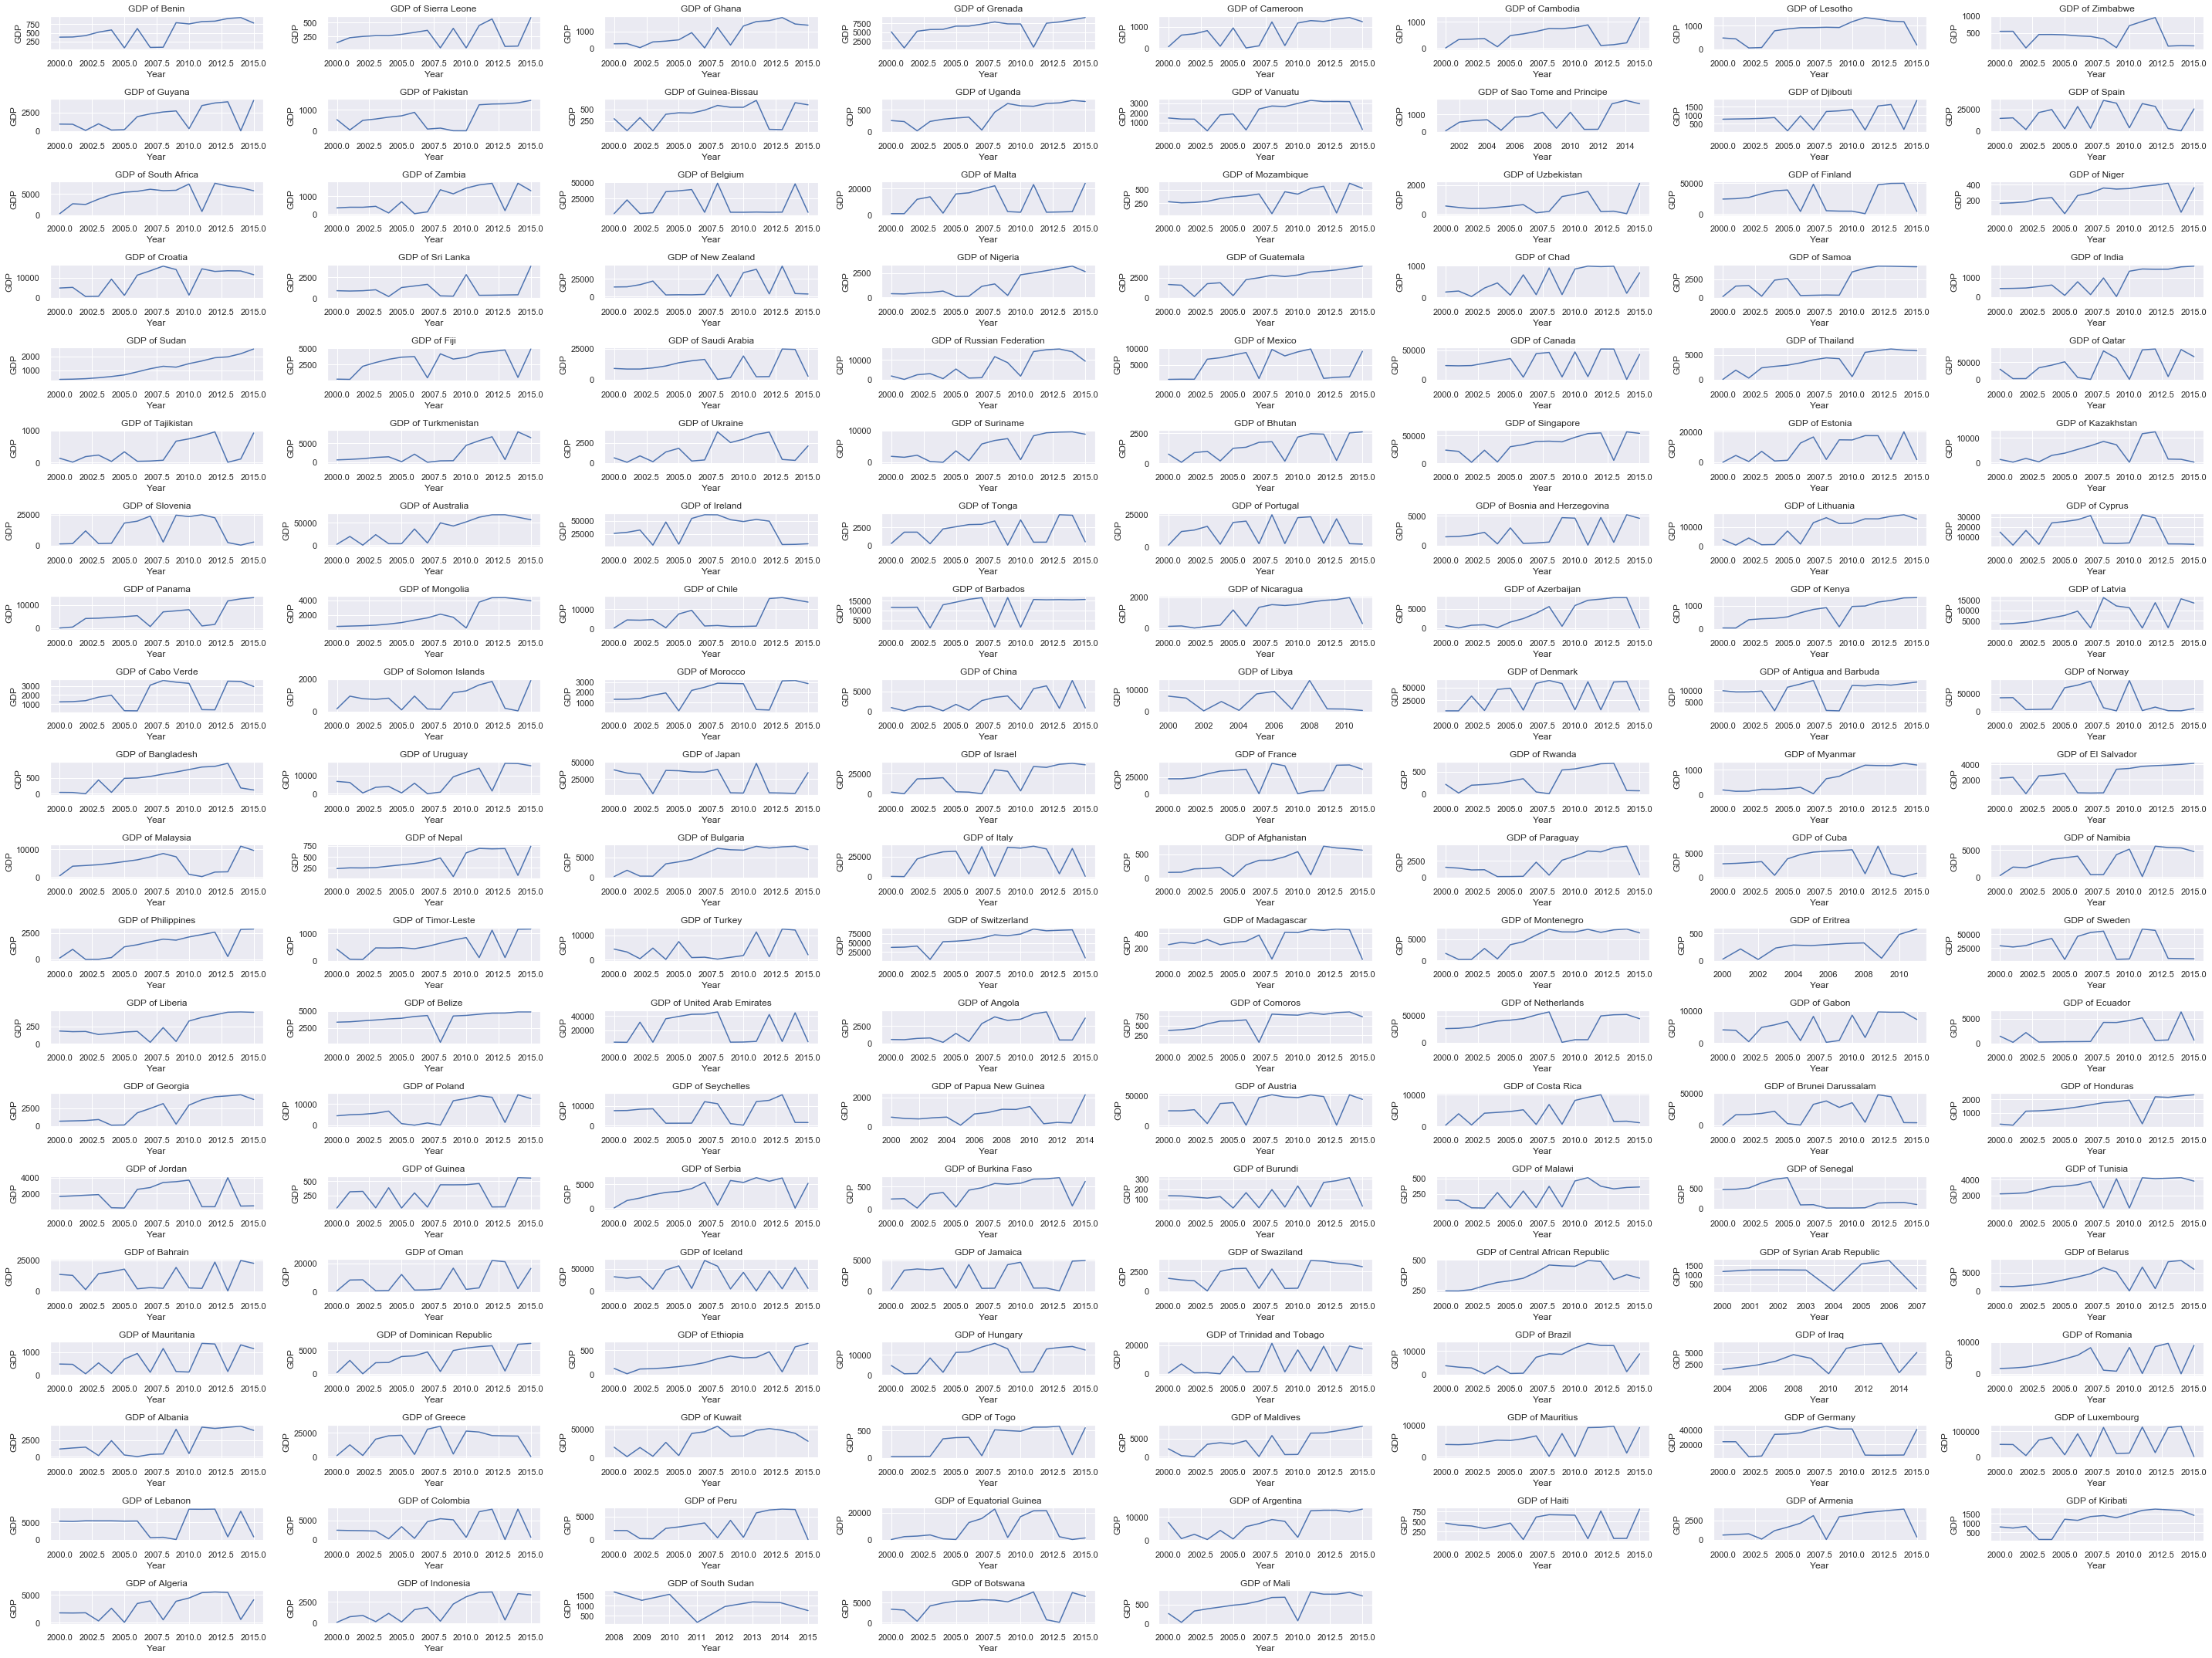

In [62]:
#check GDP by country 

plt.figure(figsize=(40,30))

countries = valid_country

#histograms of the original data

for country in countries:
    
    plt.subplot(20, 8, countries.index(country)+1)
    sns.lineplot(x=le0[le0['Country']==country]['Year'], y=le0[le0['Country']==country]['GDP'])
    plt.title("GDP of {}".format(country))


plt.tight_layout()
plt.show()

As we can see from the plots, all these countries have dramatic drop in GDP which needs to be scrutinized further. Since we observe the abnormalities are mainly casued by missinputing a digit (reflected by the dramatic drop), I defined a value as an outlier if it is less than 20% of the group maximum value. As we can see from the plot below, abnormality issue has been resolved. 

In [63]:
#replace outliers with nan for GDP for each country by appropriately defining outliers 

def replace(group):
    median, std, larg = group.median(), group.std(), group.max() 
    outliers = (group / larg) < 0.2
    group[outliers] = np.nan
    return group 

temp_GDP = le0.groupby('Country')['GDP'].transform(replace)
le1 = le0[['Country','Status']].join(temp_GDP)
le0['GDP2']=le1['GDP']

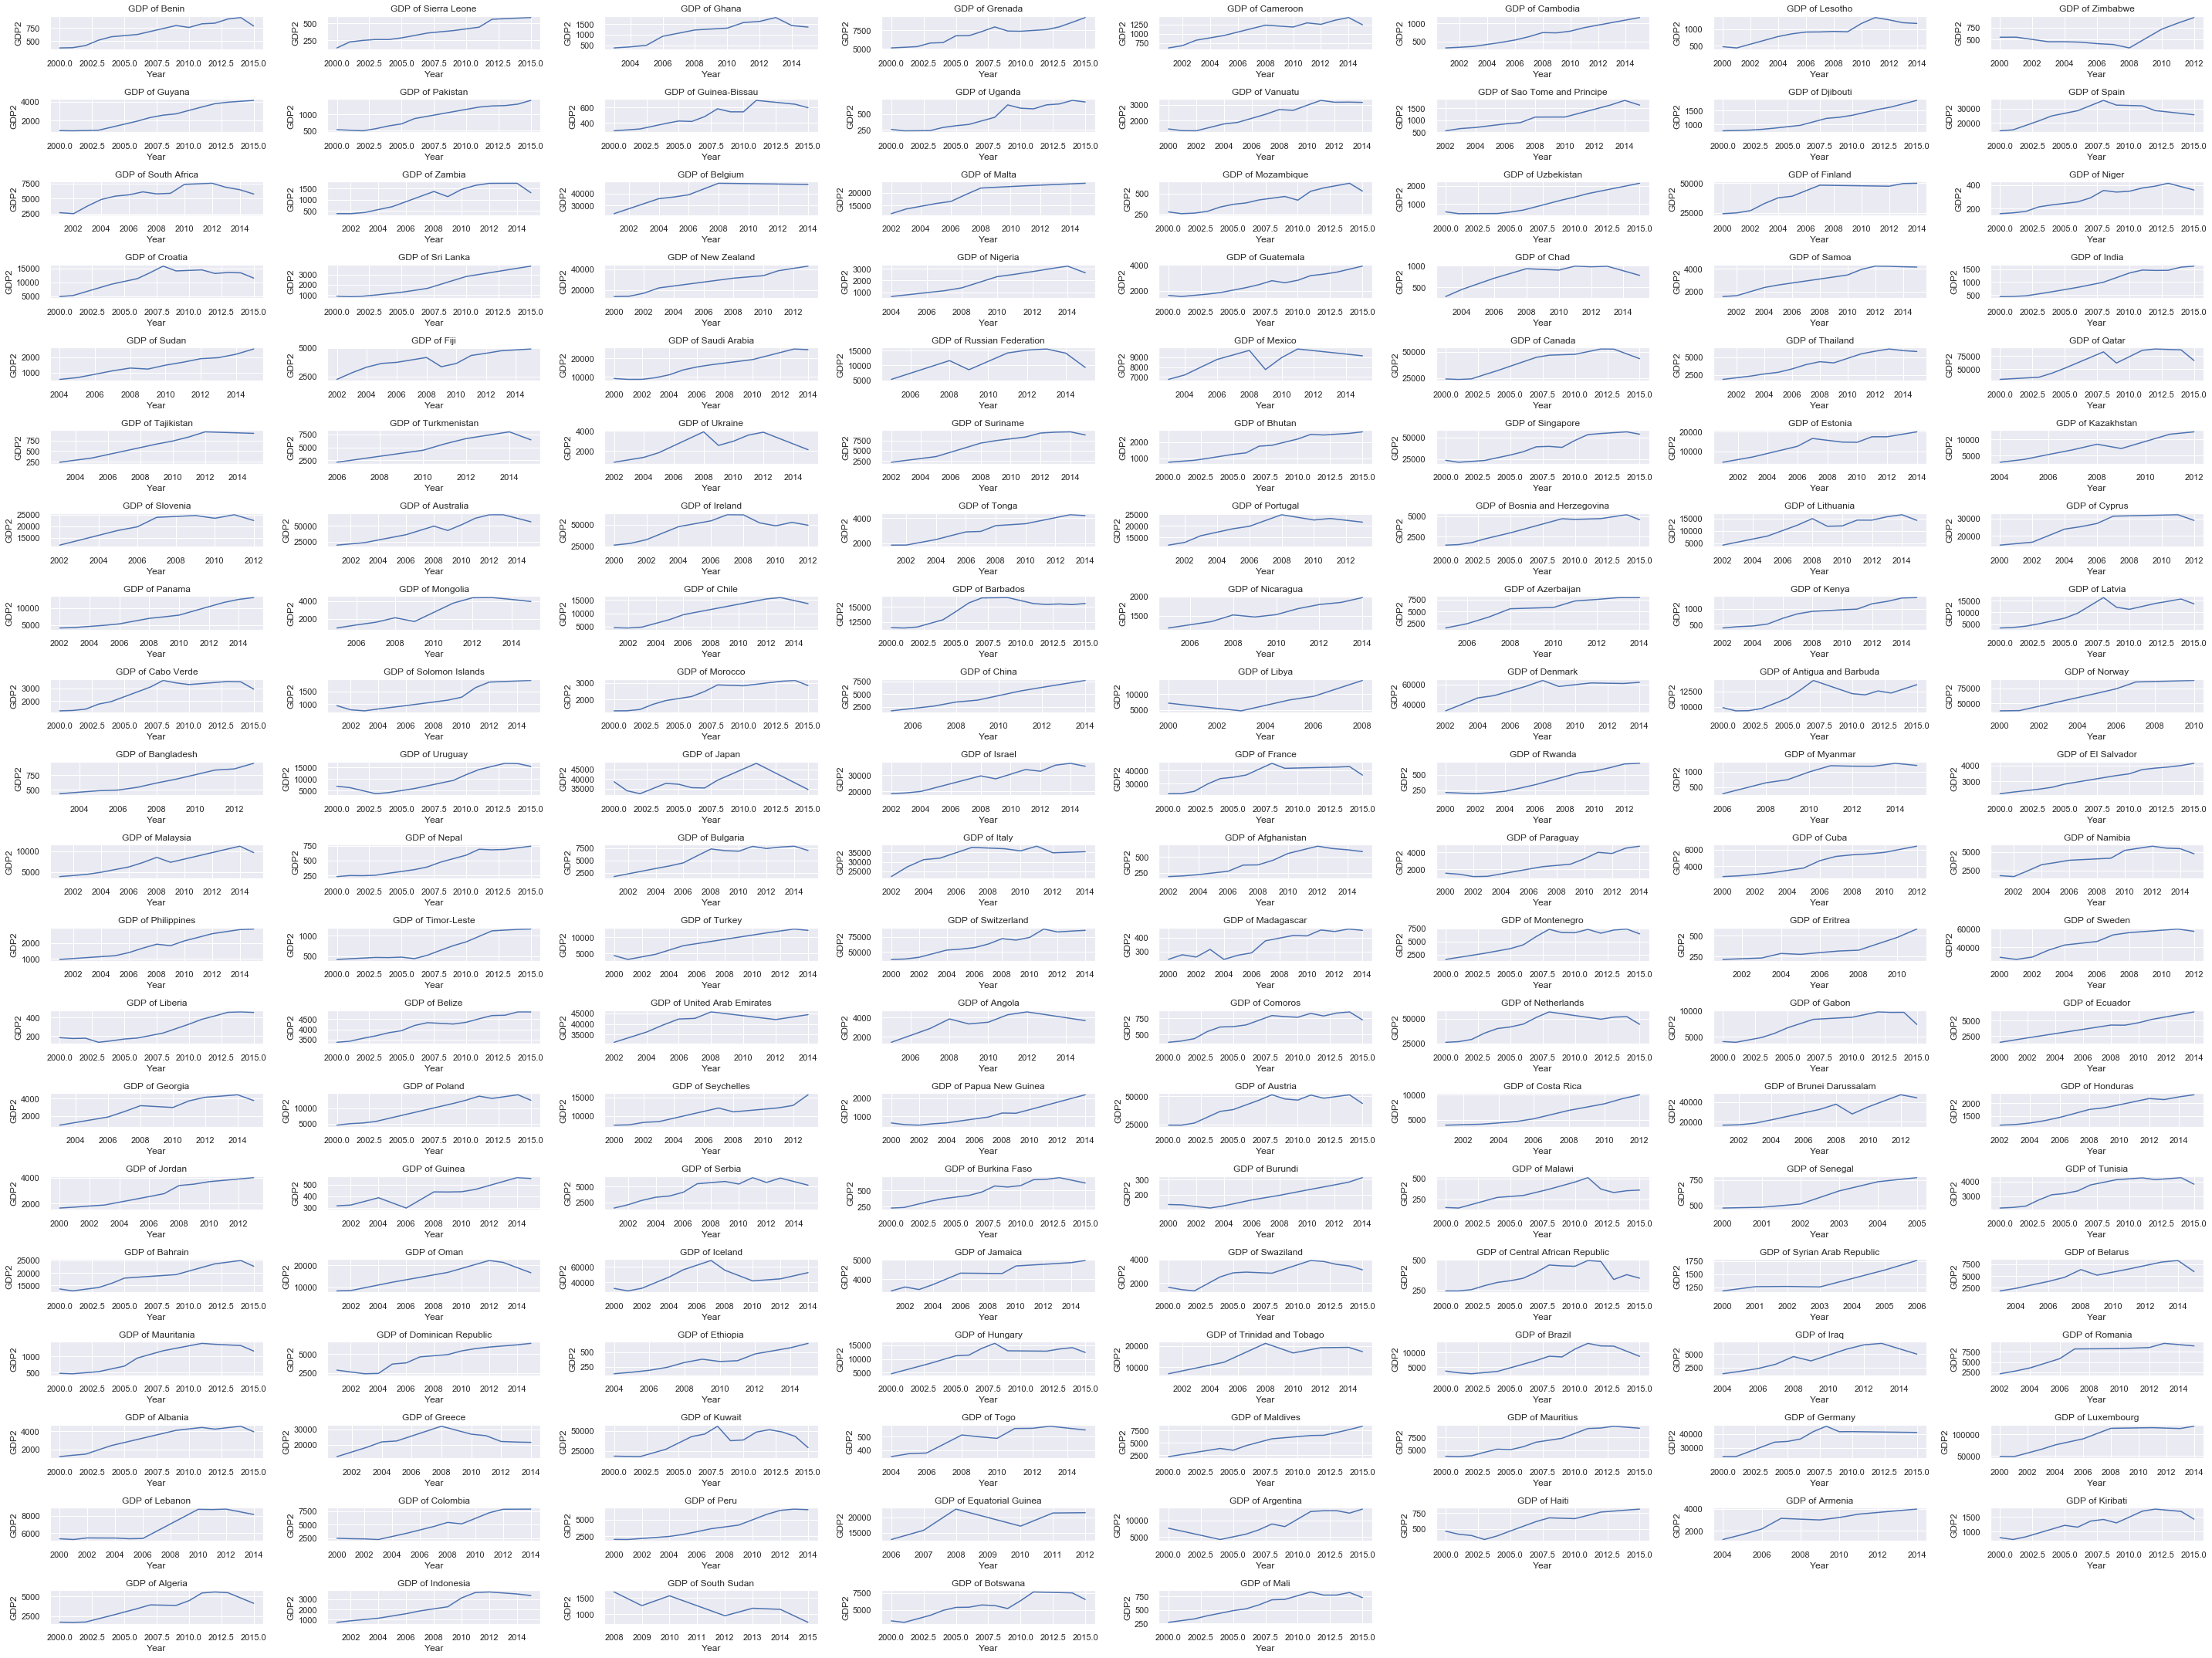

In [64]:
#check GDP2 by country after replacing outliers with NaN

plt.figure(figsize=(40,30))

countries = valid_country

for country in countries:
    
    plt.subplot(20, 8, countries.index(country)+1)
    sns.lineplot(x=le0[le0['Country']==country]['Year'], y=le0[le0['Country']==country]['GDP2'])
    plt.title("GDP of {}".format(country))


plt.tight_layout()
plt.show()

### Come back to missing values

In [17]:
le0.isnull().sum()/le0.isnull().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.065915
percentage expenditure             0.000000
Hepatitis B                        0.188866
Measles                            0.000000
 BMI                               0.010929
under-five deaths                  0.000000
Polio                              0.006489
Total expenditure                  0.077186
Diphtheria                         0.006489
 HIV/AIDS                          0.000000
GDP                                0.151298
Population                         0.219945
 thinness  1-19 years              0.010929
 thinness 5-9 years                0.010929
Income composition of resources    0.054645
Schooling                          0.054645
GDP2                            

Since it is time series data within each country, I used interpolation to replace missing values within each country.

In [65]:
#compare various methods

le0['GDP_grpmean'] = le0.groupby('Country')['GDP2'].transform(lambda x: x.fillna(x.mean()))
le0['GDP_interp'] = le0.groupby('Country')['GDP2'].apply(lambda group: group.interpolate(method='index', limit_direction='both'))

#first forward fill then backward fill within each country, this approach is more appropriate than others as shown below
le0['GDP_ffill'] = le0.groupby('Country')['GDP2'].fillna(method='ffill')
le0['GDP_fbfill'] = le0.groupby('Country')['GDP_ffill'].fillna(method='bfill')

#le0['GDP_fbfill'].isnull().sum()/le0['GDP_fbfill'].isnull().count()

In [66]:
le0[le0['Country']=='Eritrea'][['Country','Year','GDP','GDP2','GDP_grpmean','GDP_interp','GDP_fbfill']]

,Country,Year,GDP,GDP2,GDP_grpmean,GDP_interp,GDP_fbfill
866,Eritrea,2000,28.196949,NaN,335.447120,582.775532,215.139213
865,Eritrea,2001,215.139213,215.139213,215.139213,215.139213,215.139213
864,Eritrea,2002,21.768798,NaN,335.447120,582.775532,215.139213
863,Eritrea,2003,232.794546,232.794546,232.794546,232.794546,232.794546
862,Eritrea,2004,287.422224,287.422224,287.422224,287.422224,287.422224
861,Eritrea,2005,276.758960,276.758960,276.758960,276.758960,276.758960
860,Eritrea,2006,297.828588,297.828588,297.828588,297.828588,297.828588
859,Eritrea,2007,317.329434,317.329434,317.329434,317.329434,317.329434
858,Eritrea,2008,326.825642,326.825642,326.825642,326.825642,326.825642
857,Eritrea,2009,43.754450,NaN,335.447120,582.775532,326.825642


In [67]:
#use this method to replace missing values for all other variables

var = ['GDP2', 'Hepatitis B', 'Total expenditure', 'Alcohol', 'Schooling',
       'Income composition of resources', ' BMI ', ' thinness 5-9 years',
       ' thinness  1-19 years', 'Diphtheria ', 'Polio']

le = le0.drop(columns=['GDP','GDP_grpmean','GDP_interp', 'GDP_ffill','GDP_fbfill'])


for i in var:
    colname1 = i + '_ffill'
    colname2 = i + '_fbfill'
    le[i] = le.groupby('Country')[i].fillna(method='ffill')
    le[i] = le.groupby('Country')[i].fillna(method='bfill')
    

le.isnull().sum()/le.isnull().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.005464
percentage expenditure             0.000000
Hepatitis B                        0.049180
Measles                            0.000000
 BMI                               0.010929
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.010929
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
Population                         0.219945
 thinness  1-19 years              0.010929
 thinness 5-9 years                0.010929
Income composition of resources    0.054645
Schooling                          0.054645
GDP2                               0.136612
dtype: float64

The remaining missing values are from those countries without any data across 16 years. 

## Data Exploration 

### Univariate visualization for continuous variables 

Continous variables follow various distributions as shown in the histograms below. 

In [68]:
le.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,GDP2
count,2928.00000,2928.000000,2928.000000,2928.000000,2912.000000,2928.000000,2784.000000,2928.000000,2896.000000,2928.000000,2928.000000,2896.000000,2928.000000,2928.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000,2528.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.527874,740.321185,75.815374,2427.855874,38.235394,42.179303,82.304986,5.931609,82.071721,1.747712,1.276454e+07,4.850622,4.881423,0.627419,11.999639,10813.148756
std,4.61056,9.523867,124.292079,118.114450,4.070388,1990.930605,28.593029,11485.970937,19.959590,160.700547,23.626164,2.503598,23.907556,5.085542,6.103765e+07,4.420829,4.509609,0.210978,3.346440,17000.037728
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,3.400000e+01,0.100000,0.100000,0.000000,0.000000,112.849373
25%,2003.75000,63.100000,74.000000,0.000000,0.640000,4.853964,66.000000,0.000000,19.300000,0.000000,77.000000,4.260000,78.000000,0.100000,1.966738e+05,1.600000,1.575000,0.493000,10.100000,955.648466
50%,2007.50000,72.100000,144.000000,3.000000,3.630000,65.611455,89.000000,17.000000,43.350000,4.000000,93.000000,5.730000,93.000000,0.100000,1.391756e+06,3.300000,3.400000,0.677000,12.300000,3645.463122
75%,2011.25000,75.700000,228.000000,22.000000,7.640000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.500000,97.000000,0.800000,7.426746e+06,7.200000,7.200000,0.779250,14.300000,12333.752200
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,1.293859e+09,27.700000,28.600000,0.948000,20.700000,119172.741800


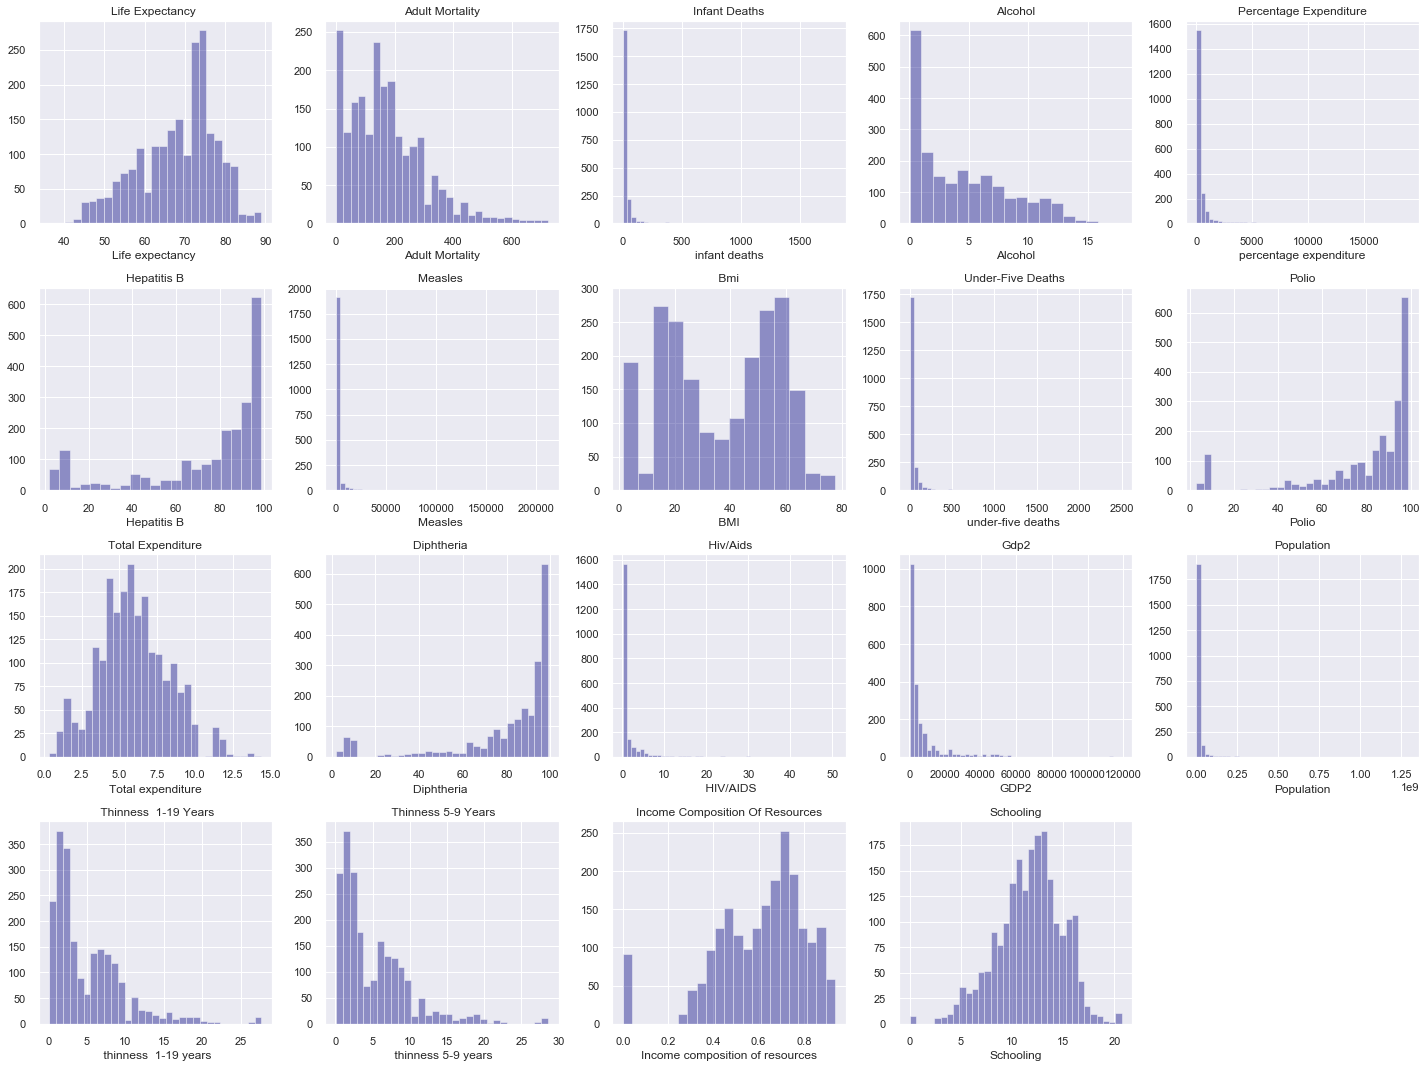

In [72]:
plt.figure(figsize=(20,15))

var = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP2', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

le3 = le.dropna(axis=0)

for i in range(len(var)):
    
    plt.subplot(4, 5, i+1)
    sns.distplot(le3[var[i]], kde=False, color='navy')
    plt.title(var[i].title())

    
plt.tight_layout()
plt.show()

### Univariable visualization of categorical variables 

As we can see, the majority countries are developing countries (83%).

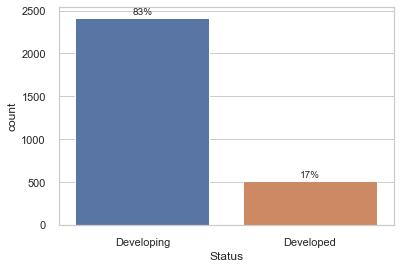

In [25]:
ax = sns.countplot(x='Status', data=le)

total = float(len(le))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 40,
            '{0:.0%}'.format(height/total),
            ha="center") 

plt.show()

### Bivariate analysis of one continous variable and the target variable 

At the first glance at the correlation matrix, I would consider to use all variables except for population in the model. There are two reasons: 1) many countries have systematic missings on population, 2) there's almost no correlation between population and life expectancy. 

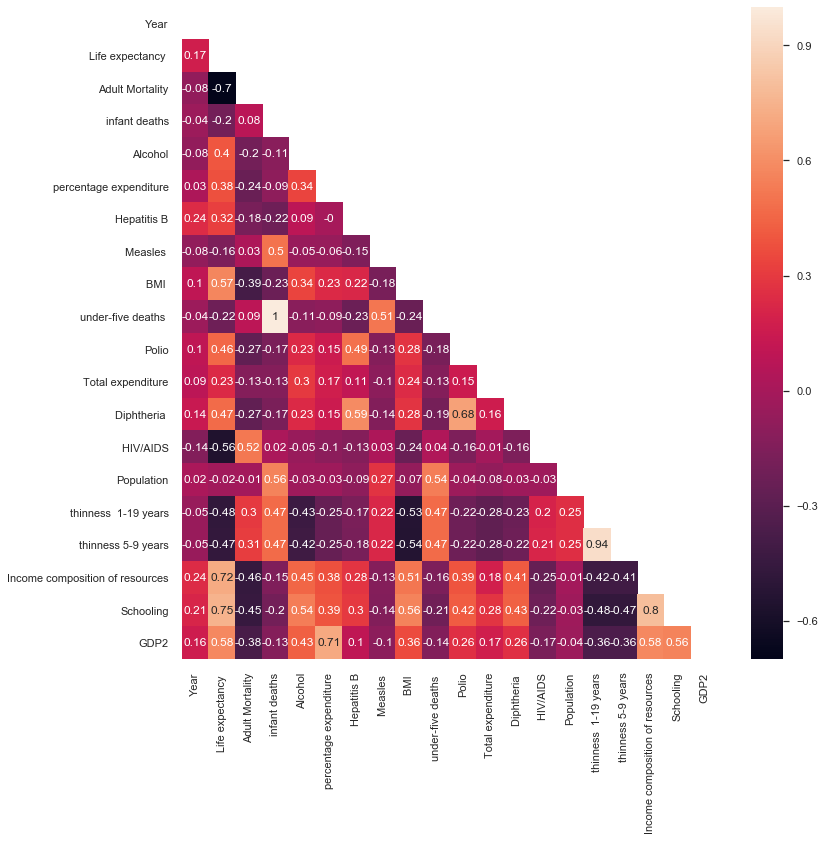

In [26]:
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(12,12))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(dataframe.corr())
    mask [np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr().round(2), mask=mask, annot=True)
        
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return 

half_masked_corr_heatmap(le)

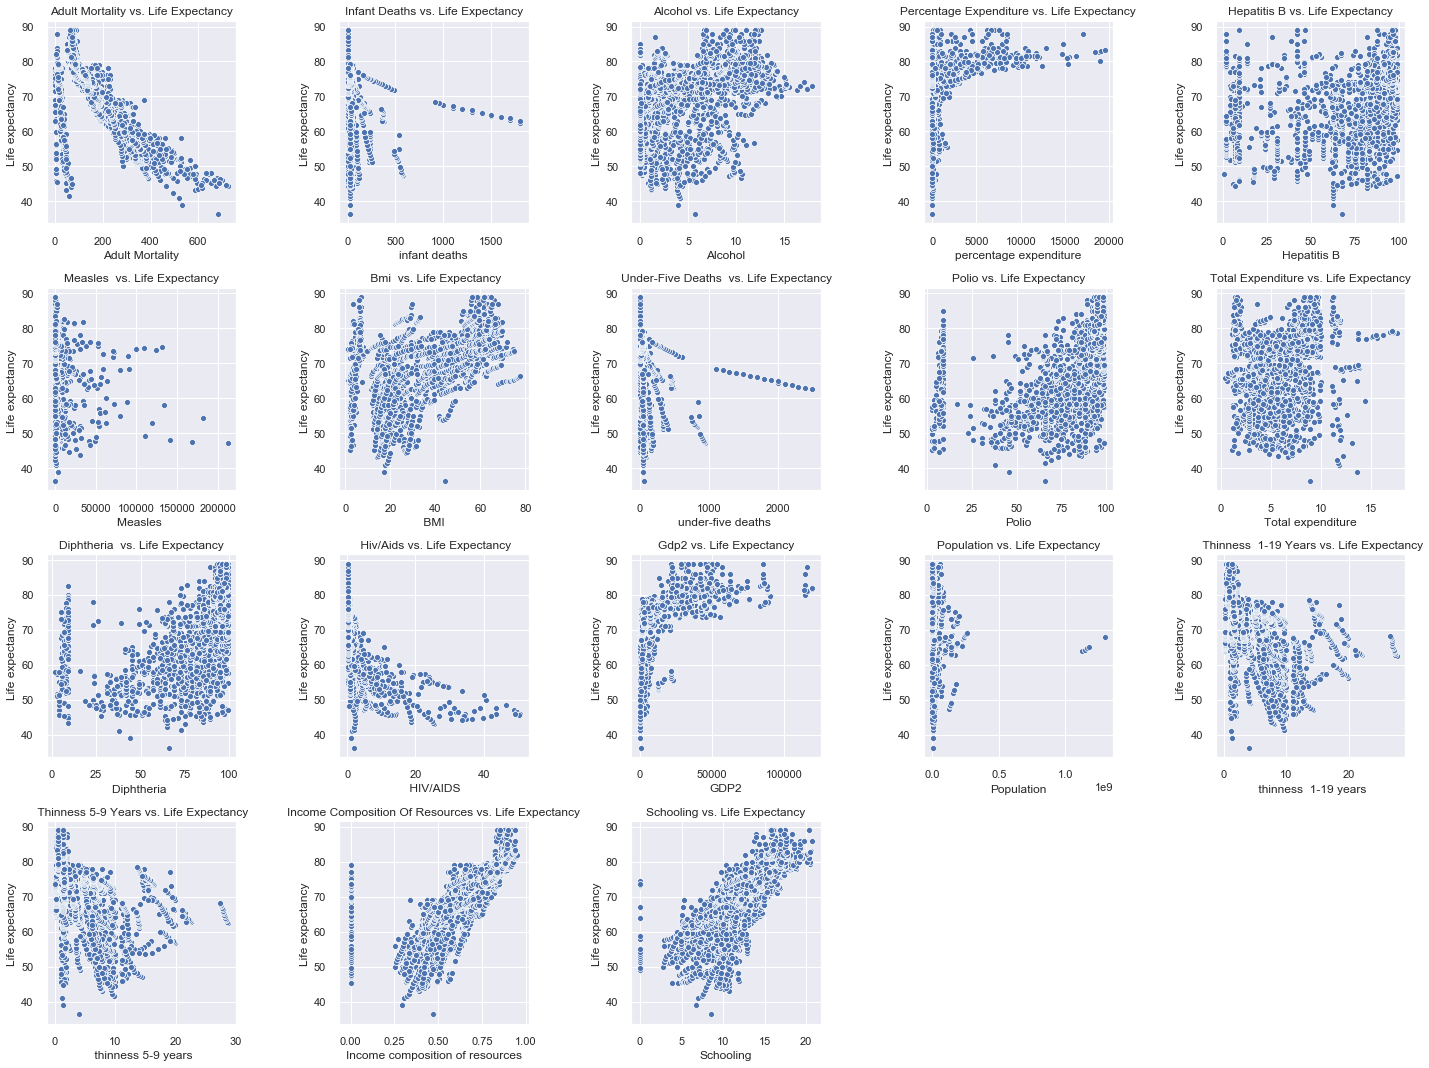

In [27]:
plt.figure(figsize=(20,15))

var = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP2', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

for i in range(len(var)):
    
    plt.subplot(4, 5, i+1)
    sns.scatterplot(x=var[i], y='Life expectancy ', data=le)
    plt.title('{} vs. Life Expectancy'.format(var[i].title()))

    
plt.tight_layout()
plt.show()

## Feature Engineering

### Change categorical variable to dummies

In [73]:
#change categorical variable status to dummy variable
le = pd.concat([le, pd.get_dummies(le['Status'], drop_first=True)], axis=1)
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,GDP2,Developing
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,293756.0,2.3,2.5,0.338,5.5,187.845950,1
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,2966463.0,2.1,2.4,0.340,5.9,187.845950,1
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,13.0,122,36.0,7.76,36.0,0.1,21979923.0,19.9,2.2,0.341,6.2,187.845950,1
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,13.4,122,41.0,8.82,41.0,0.1,2364851.0,19.7,19.9,0.373,6.5,198.728544,1
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,13.8,120,5.0,8.79,5.0,0.1,24118979.0,19.5,19.7,0.381,6.8,219.141353,1


### Dealing with non normality

First, check if the target variable is normally distributed using normality test. Both jarque-Bera test and Normality test show it is significantly different from normal distribution. Then, transformation is applied. Neither log nor box-cox transformation provides normal distribution, however, log transformation performs better. I will keep the log-transformed Life expectancy as the target variable. 

In [74]:
var = ['Life expectancy ']


for i in range(0, len(var)):
    
    jb_stats1 = jarque_bera(le[var[i]])
    norm_stats1 = normaltest(le[var[i]])
    print("----------------------------------------------------")
    print("Normality Test for Original {}".format(var[i].title()))
    print("Jarque-Bera test statistics is {0} and p-value is {1}".format(jb_stats1[0],jb_stats1[1]))
    print("Normality test statistics is {0} and p-vallue is {1}".format(norm_stats1[0], norm_stats1[1]))

----------------------------------------------------
Normality Test for Original Life Expectancy 
Jarque-Bera test statistics is 205.61247743959166 and p-value is 0.0
Normality test statistics is 177.35500491008435 and p-vallue is 3.075034656881726e-39


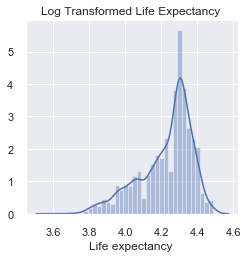

----------------------------------------------------
Normality Test for Log Transformed Life Expectancy 
Jarque-Bera test statistics is 453.83835318055327 and p-value is 0.0
Normality test statistics is 333.3101211321815 and p-vallue is 4.193984440267274e-73


In [75]:
var = ['Life expectancy ']


plt.figure(figsize=(20,10))

for i in range(0, len(var)):
    
    plt.subplot(3, 6, i+1)
    sns.distplot(np.log(le[var[i]]))
    plt.title("Log Transformed {}".format(var[i].title()))

plt.tight_layout()
plt.show()


for i in range(0, len(var)):

    jb_stats2 = jarque_bera(np.log(le[var[i]]))
    norm_stats2 = normaltest(np.log(le[var[i]]))
    print("----------------------------------------------------")
    print("Normality Test for Log Transformed {}".format(var[i].title()))
    print("Jarque-Bera test statistics is {0} and p-value is {1}".format(jb_stats2[0],jb_stats2[1]))
    print("Normality test statistics is {0} and p-vallue is {1}".format(norm_stats2[0], norm_stats2[1]))

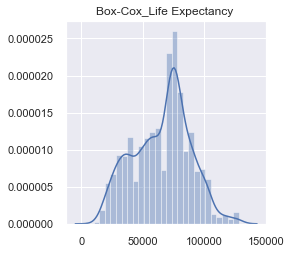

----------------------------------------------------
Normality Test for Box-Cox Transformed Life Expectancy 
Jarque-Bera test statistics is 42.42531209066446 and p-value is 6.130000951287684e-10
Normality test statistics is 77.70452292704684 and p-vallue is 1.3386814237462102e-17


In [76]:
var = ['Life expectancy ']


plt.figure(figsize=(20,10))

for i in range(0, len(var)):
 
    boxcox_score,_ = boxcox(le[var[i]][le[var[i]]>0])
    
    plt.subplot(3, 6, i+1)
    sns.distplot(boxcox_score)
    plt.title("Box-Cox_{}".format(var[i].title()))

plt.tight_layout()
plt.show()


for i in range(0, len(var)):
    
    boxcox_score,_ = boxcox(le[var[i]][le[var[i]]>0])
    jb_stats2 = jarque_bera(boxcox_score)
    norm_stats2 = normaltest(boxcox_score)
    print("----------------------------------------------------")
    print("Normality Test for Box-Cox Transformed {}".format(var[i].title()))
    print("Jarque-Bera test statistics is {0} and p-value is {1}".format(jb_stats2[0],jb_stats2[1]))
    print("Normality test statistics is {0} and p-vallue is {1}".format(norm_stats2[0], norm_stats2[1]))

In [77]:
le['Life expectancy '] = np.log(le['Life expectancy '])
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,GDP2,Developing
15,Afghanistan,2000,Developing,4.003690,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,293756.0,2.3,2.5,0.338,5.5,187.845950,1
14,Afghanistan,2001,Developing,4.012773,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,2966463.0,2.1,2.4,0.340,5.9,187.845950,1
13,Afghanistan,2002,Developing,4.028917,3.0,88,0.01,16.887351,64.0,2486,13.0,122,36.0,7.76,36.0,0.1,21979923.0,19.9,2.2,0.341,6.2,187.845950,1
12,Afghanistan,2003,Developing,4.037774,295.0,87,0.01,11.089053,65.0,798,13.4,122,41.0,8.82,41.0,0.1,2364851.0,19.7,19.9,0.373,6.5,198.728544,1
11,Afghanistan,2004,Developing,4.043051,293.0,87,0.02,15.296066,67.0,466,13.8,120,5.0,8.79,5.0,0.1,24118979.0,19.5,19.7,0.381,6.8,219.141353,1


### Check correlations between variables

In [80]:
abs(le.corr().loc[:,'Life expectancy ']).sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.733259
Income composition of resources    0.708864
Adult Mortality                    0.699179
 HIV/AIDS                          0.586808
 BMI                               0.561010
GDP2                               0.541157
Diphtheria                         0.475857
 thinness  1-19 years              0.459905
Polio                              0.459758
 thinness 5-9 years                0.453037
Developing                         0.449825
Alcohol                            0.376742
percentage expenditure             0.352872
Hepatitis B                        0.322143
under-five deaths                  0.218838
Total expenditure                  0.210870
infant deaths                      0.191366
Year                               0.173001
Measles                            0.160193
Population                         0.015909
Name: Life expectancy , dtype: float64

Since there are not so many features in this dataset, I firstly use the filter method to select features. The following variables have relatively higher correlation (r > 0.5) with the target variable: Schooling, Income composition of resources, Adult Mortality, HIV/AIDS, BMI, and GDP2. Then the correlations between these variables are checked. I decide to keep all these variables and Developing at the first step. 

In [35]:
le_feature = le.drop(columns=['Status', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years'])
le_feature.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality', ' BMI ',
       ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'GDP2',
       'Developing'],
      dtype='object')

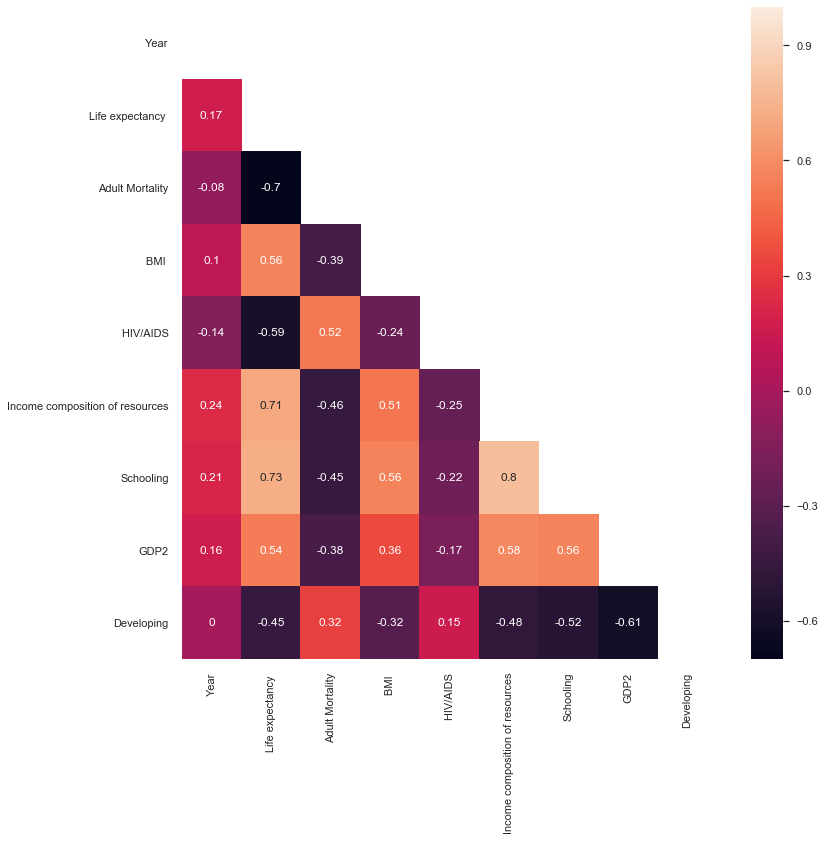

In [36]:
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(12,12))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(dataframe.corr())
    mask [np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr().round(2), mask=mask, annot=True)
        
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return 

half_masked_corr_heatmap(le_feature)


### PCA

Since we see many variables are highly correlated and they all seem reasonable to predict life expectancy, I use PCA to select final features. 

In [129]:
le_final = le.dropna(axis=0)

In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = le_final[['Adult Mortality', ' BMI ', ' HIV/AIDS', 'Income composition of resources', 
              'Schooling', 'GDP2', 'Developing']]

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(X)

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

print(
    'The percent of total variance in the dataset explained by each',
    'component from Sklearn PCA:\n',
    np.round(pca.explained_variance_ratio_, decimals=3)*100
)

print(
    'The cumulative sum of variance explained:',
    var
)

The percent of total variance in the dataset explained by each component from Sklearn PCA:
 [51.  17.  11.2  7.   6.2]
The cumulative sum of variance explained: [51.  68.  79.2 86.2 92.4]


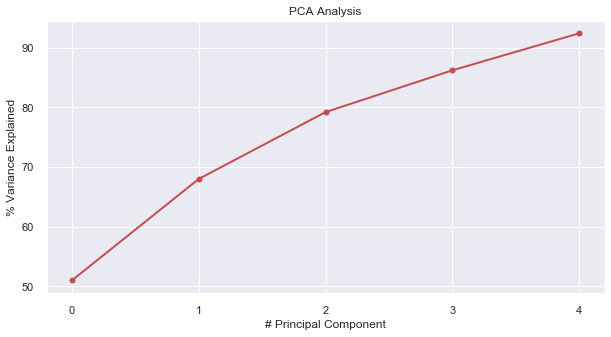

In [152]:
fig = plt.figure(figsize=(10,5))
sing_vals = np.arange(0, pca.n_components_, 1)
plt.plot(sing_vals, var, 'ro-', linewidth=2)
plt.title('PCA Analysis')
plt.xticks(np.arange(0,5,1))
plt.xlabel('# Principal Component')
plt.ylabel('% Variance Explained')
plt.show()

As can be seen from the plot above, the first five components explains 92.4% of the variance within our dataset. I decide to keep them all in the modeling phase. 

In [146]:
principalDF = pd.DataFrame(data=principleComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
finalDF = pd.concat([le_final[['Life expectancy ']],principalDF],  axis=1)
finalDF.head()

,Life expectancy,pc1,pc2,pc3,pc4,pc5
0,4.174387,-2.602224,-0.359767,1.086201,0.406259,-0.704415
1,4.092677,-2.520459,-0.360539,1.040924,0.369129,-0.689324
2,4.092677,-1.658752,-1.605073,1.329670,0.079162,1.132176
3,4.085976,-2.292646,-0.399830,0.941858,0.238054,-0.610500
4,4.080922,-2.219052,-0.389549,0.895222,0.200023,-0.614198
